In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot




path = "HR_comma_sep.csv"
main_data = pd.read_csv(path) 

In [31]:
main_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [32]:
main_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [33]:
main_data.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


In [34]:
pd.crosstab(main_data['salary'], main_data['left'])

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


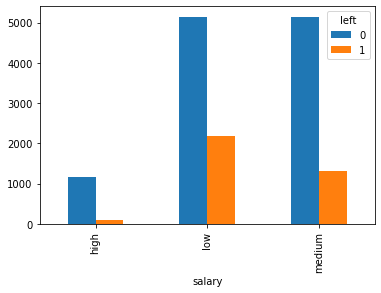

In [35]:
pd.crosstab(main_data['salary'], main_data['left']).plot(kind='bar')

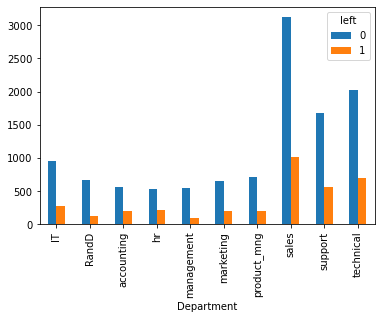

In [36]:
pd.crosstab(main_data['Department'], main_data['left']).plot(kind='bar')

so thats why we will use satisfaction_level	average_montly_hours promotion_last_5years and salary as variable

In [37]:
main_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [38]:
features=['satisfaction_level','average_montly_hours','promotion_last_5years']

In [39]:
X = main_data[features]


In [40]:
X.dropna()

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0
...,...,...,...
14994,0.40,151,0
14995,0.37,160,0
14996,0.37,143,0
14997,0.11,280,0


In [41]:
y= main_data['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=99)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((10499, 3), (4500, 3), (10499,), (4500,))

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')



In [57]:
model.fit(train_x, train_y)
v =model.predict(test_x)
v

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

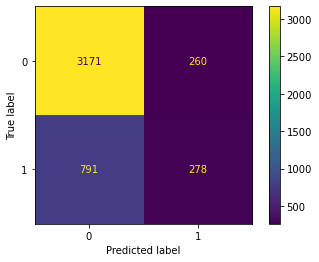

In [61]:
plot_confusion_matrix(model, test_x, test_y)

In [63]:
accuracy_score(test_y,v)

0.7664444444444445

we are getting 76% accuracy!!!